In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load data

In [2]:
header_file = open('assets/header.txt','r')
text = header_file.read()
text

'CPL_wrt_BC,\nclient_state,\nduration,\nnum_prods,\ncalls,\nCPL_wrt_self,\nchurn,\navg_budget,\nBC,\nclicks,\n'

In [3]:
header = text.split(',\n')[:-1]
header

['CPL_wrt_BC',
 'client_state',
 'duration',
 'num_prods',
 'calls',
 'CPL_wrt_self',
 'churn',
 'avg_budget',
 'BC',
 'clicks']

In [4]:
df = pd.read_csv('assets/data.csv',names=header)
df.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    8908 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


In [6]:
df[df['CPL_wrt_self'].isna()]

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
8,0.000000,MD,53,2,3,NaN,0,2812.286923,Home & Home Improvement,113
21,0.000000,WA,36,4,1,NaN,0,2257.655829,Home & Home Improvement,73
35,0.000000,CA,108,3,4,NaN,0,510.823940,Home & Home Improvement,132
68,0.000000,IL,40,4,8,NaN,0,7924.382535,Home & Home Improvement,65
85,0.000000,GA,62,4,2,NaN,0,1438.468633,Furniture,129
87,-0.111111,CA,56,2,4,NaN,1,2096.359612,Home & Home Improvement,131
105,0.000000,NY,36,3,2,NaN,0,2092.187653,Home & Home Improvement,65
108,0.000000,FL,31,2,9,NaN,0,1558.546529,Home & Home Improvement,97
114,-0.094938,NH,6,1,7,NaN,0,1606.624487,Automotive -- For Sale,101


**There are missing values in CPL_wrt_self (1092 observations)**

In [7]:
# take a look at description of each variables
with open("assets/dict.txt", "r") as ins:
    array = []
    for line in ins:
        array.append(line.strip())

In [8]:
desc = list(filter(None, array))
desc

['CPL_wrt_BC=change in cost per lead with respect to business category',
 "client_state=client's location",
 'duration=how long the client has been running advertising campaigns in months',
 'num_prods=how many distinct advertising products the client has bought',
 'calls=number of calls received',
 "CPL_wrt_self=change in client's cost per lead in the past three months",
 'churn=target column (0=retention | 1=churn)',
 'avg_budget=average monthly budget spent on advertising campaigns',
 "BC=client's business category",
 'clicks=number of clicks received']

In [9]:
df.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


### 2. target variable

In [10]:
df.churn.value_counts()

0    8000
1    2000
Name: churn, dtype: int64

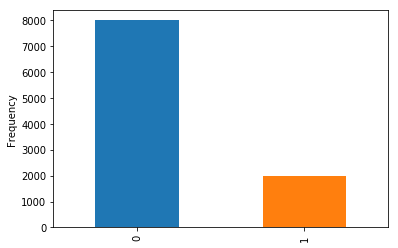

In [11]:
df.churn.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.show()

80% observation with zero-value for target variable (for retetion)

### 3. Independent variables

In [12]:
# Descriptive statistics for all numerical variables
df.describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,10000.000000,10000.000000,10000.000000,10000.000000,8908.000000,10000.00000,10000.000000,10000.000000
mean,-0.068958,27.669200,1.327200,4.526100,0.602664,0.20000,1512.601132,99.214900
std,0.491693,25.500847,0.816582,2.859185,11.135854,0.40002,3473.160720,31.701757
min,-0.994590,1.000000,0.000000,0.000000,-1.000000,0.00000,9.090909,13.000000
25%,-0.103273,6.000000,1.000000,2.000000,-0.255226,0.00000,476.056955,76.000000
50%,-0.088810,19.000000,1.000000,5.000000,0.000000,0.00000,907.839383,96.000000
75%,-0.048530,42.000000,1.000000,7.000000,0.311280,0.00000,1666.499256,119.000000
max,19.088412,118.000000,11.000000,9.000000,841.288094,1.00000,148555.594376,253.000000


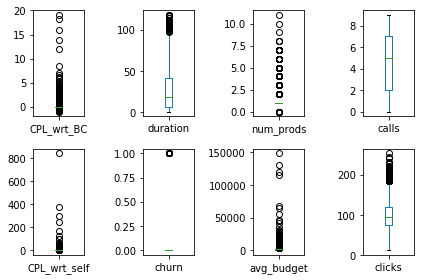

In [13]:
df.plot.box(subplots=True,layout=(2,4))
plt.tight_layout()
plt.show()

Box-plot figures indicates that there are some extreme values for CPL_wrt_BC, CPL_wrt_self, avg_budget, duration and clicks.

### a. CPL_wrt_BC, CPL_wrt_self

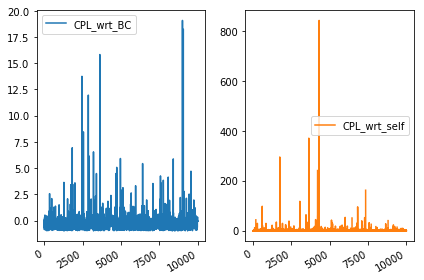

In [14]:
df[['CPL_wrt_BC','CPL_wrt_self']].plot(subplots=True,layout=(1,2))
plt.tight_layout()
plt.show()

Some values of CPL_wrt_self are extremely higher than CPL_wrt_BC.
I think it is generally said that CPL_wrt_self is higher than CPL_wrt_BC.

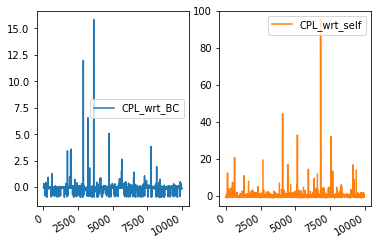

In [15]:
# with target variables == 1 (ending advertising program)
df[df['churn']==1][['CPL_wrt_BC','CPL_wrt_self']].plot(subplots=True,layout=(1,2))
plt.show()

In case of churn==1, CPL_wrt_self is still higher than CPL_wrt_BC. But, values of CPL_wrt_self is not too high.

### b. Duration

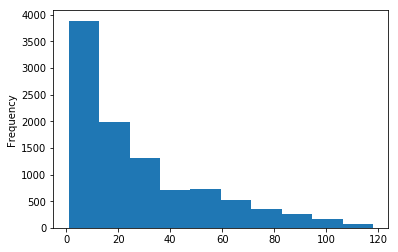

In [16]:
df.duration.plot.hist()
plt.show()

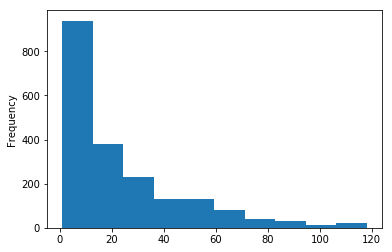

In [17]:
df[df['churn']==1].duration.plot.hist()
plt.show()

Duration of most clients are around 2 years (mean of this variable is 27.7 months). For very high values of duration, it could make sense (clients feel satisfied with advertising campaign. It helps their business)

### c. num_prods = how many distinct advertising products the client

In [18]:
df.num_prods.value_counts()

1     7875
2     1319
3      431
4      171
5       93
0       64
6       24
7       17
8        3
11       1
10       1
9        1
Name: num_prods, dtype: int64

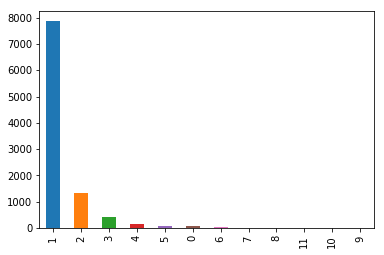

In [19]:
df.num_prods.value_counts().plot.bar()

Most of clients use only 1 distinct advertising product.

### d. calls and clicks

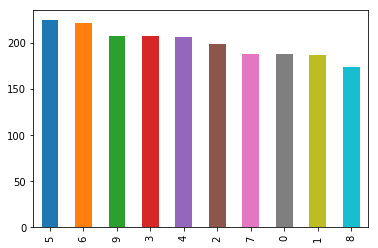

In [20]:
# clients with churn
df[df['churn']==1].calls.value_counts().plot.bar()

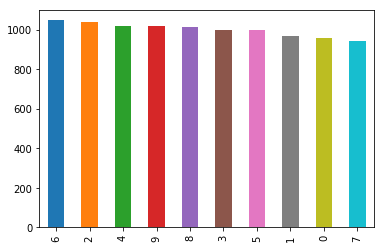

In [21]:
# all clients
df.calls.value_counts().plot.bar()

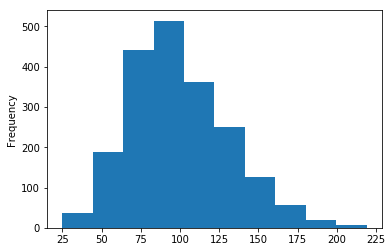

In [22]:
# clients with churn
df[df['churn']==1].clicks.plot.hist()

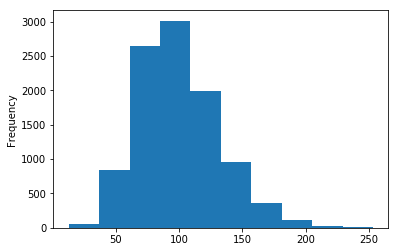

In [23]:
# all clients
df.clicks.plot.hist()

Number of calls and clicks received are variables that could illustrate the effect of advertisement.
- calls: it seems to be similar for all clients (uniform distribution).
- clicks: customer is more interested with the product via advertisement.

### e. avg_budget

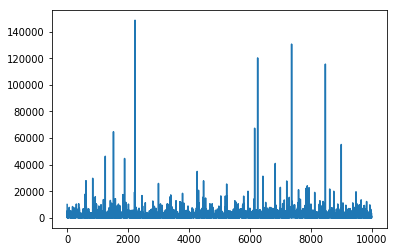

In [24]:
df['avg_budget'].plot()

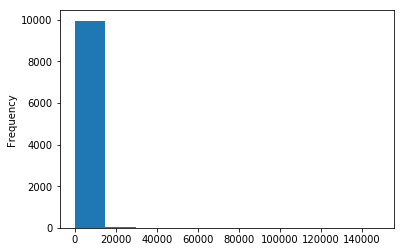

In [25]:
df['avg_budget'].plot.hist()

In [26]:
np.percentile(df['avg_budget'],[5,95])

array([ 129.40784314, 4335.02933813])

In [27]:
np.sum(df['avg_budget']>4335.02933813)

500

- Average of avg_budget is around 1512.6.
- There are around 500 client need to spend very high cost for advertisemnt.
- In reality, it is said that there have a range of advertisers from very low spending to very high spending.

### f. Categorical variables

In [28]:
df.BC.unique()

array(['Beauty & Personal Care',
       'Shopping, Collectibles & Gifts (General)',
       'Personal Services (Weddings, Cleaners, etc.)', 'Travel',
       'Health & Fitness', 'Education & Instruction', 'Business Services',
       'Home & Home Improvement', 'Animals & Pets',
       'Dentists & Dental Services', 'Physicians & Surgeons',
       'Automotive -- Repair, Service & Parts', 'Automotive -- For Sale',
       'Sports & Recreation', 'Industrial & Commercial',
       'Finance & Insurance', 'Real Estate', 'Restaurants & Food',
       'Computers, Telephony & Internet', 'Apparel / Fashion & Jewelry',
       'Attorneys & Legal Services', 'Farming & Agriculture', 'Furniture',
       'Toys & Hobbies', 'Career & Employment', 'Electronics & Photo',
       'Government & Politics', 'Arts & Entertainment',
       'Religion & Spirituality',
       'Community, Garage Sales & Organizations',
       'Business Opportunities'], dtype=object)

In [29]:
df.BC.value_counts()

Home & Home Improvement                         2610
Shopping, Collectibles & Gifts (General)         736
Automotive -- Repair, Service & Parts            624
Automotive -- For Sale                           516
Travel                                           512
Physicians & Surgeons                            505
Health & Fitness                                 499
Personal Services (Weddings, Cleaners, etc.)     475
Education & Instruction                          447
Attorneys & Legal Services                       415
Business Services                                389
Industrial & Commercial                          286
Furniture                                        281
Real Estate                                      280
Sports & Recreation                              259
Animals & Pets                                   221
Dentists & Dental Services                       218
Beauty & Personal Care                           196
Restaurants & Food                            

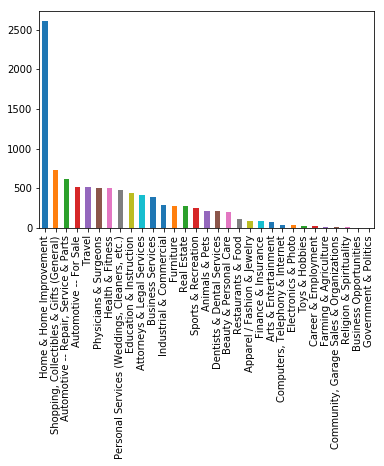

In [30]:
df.BC.value_counts().plot.bar()

In [31]:
# for churn client
df[df['churn']==1].BC.value_counts()

Home & Home Improvement                         525
Automotive -- For Sale                          143
Health & Fitness                                123
Automotive -- Repair, Service & Parts           109
Education & Instruction                          99
Business Services                                98
Travel                                           96
Attorneys & Legal Services                       91
Shopping, Collectibles & Gifts (General)         89
Physicians & Surgeons                            83
Personal Services (Weddings, Cleaners, etc.)     83
Real Estate                                      67
Sports & Recreation                              53
Furniture                                        49
Industrial & Commercial                          44
Dentists & Dental Services                       42
Restaurants & Food                               36
Beauty & Personal Care                           30
Arts & Entertainment                             26
Animals & Pe

More than 26% of clients are from 'Home & Home Improvement'. Nearly similar percentage of 'churn' clients are also in this category.

In [32]:
df['client_state'].unique()

array(['AZ', 'CA', 'NY', 'MN', 'NJ', 'WA', 'OH', 'MD', 'ME', 'VA', 'TX',
       'OR', 'MO', 'IL', 'UT', 'FL', 'CO', 'GA', 'LA', 'MA', 'PA', 'MS',
       'TN', 'IN', 'NH', 'IA', 'NC', 'NE', 'KY', 'WI', 'VT', 'AK', 'AR',
       'CT', 'OK', 'MI', 'HI', 'SD', 'DC', 'NV', 'SC', 'AL', 'KS', 'ID',
       'ND', 'WV', 'RI', 'NM', 'DE', 'MT', 'WY'], dtype=object)

In [33]:
df['client_state'].unique().shape

(51,)

In [34]:
# all clients
df['client_state'].value_counts()

CA    1745
TX     895
FL     746
NY     658
PA     564
IL     546
MD     380
GA     345
NJ     343
WA     315
VA     314
MA     299
OH     288
CO     278
AZ     278
MO     185
NC     183
OR     144
MN     137
IN     128
MI     110
TN      96
WI      90
LA      84
NV      66
SC      63
CT      54
ME      54
NH      53
UT      52
KS      51
AL      47
DC      42
RI      41
IA      40
MS      38
OK      36
KY      34
NE      29
DE      27
ID      23
AR      18
HI      18
SD      15
MT      10
AK      10
NM      10
VT       8
ND       6
WV       3
WY       1
Name: client_state, dtype: int64

In [35]:
# churn clients
df.groupby(['client_state'])['churn'].sum().sort_values(ascending=False)

client_state
CA    337
FL    177
TX    167
IL    110
PA    109
NY    108
GA     84
MD     67
VA     66
AZ     62
MA     60
WA     59
NJ     56
CO     53
OH     44
OR     41
NC     39
MO     36
IN     31
MN     30
MI     25
TN     21
CT     20
LA     17
UT     17
WI     15
IA     15
NV     15
NH     15
RI     12
SC     11
OK      8
KS      8
AL      8
KY      7
ME      7
MS      6
DC      6
HI      4
AR      4
NE      3
DE      3
NM      3
SD      3
ID      3
ND      2
MT      2
WY      1
WV      1
VT      1
AK      1
Name: churn, dtype: int64

Most of clients are in CA, TX, FL, NY, PA.